In [1]:
import os
import pickle
import models

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import seaborn as sns
from numpyro.diagnostics import hpdi

from hbmep.nn import functional as F
from hbmep.model.utils import Site as site

from hbmep.config import Config
from hbmep.model.utils import Site as site
from scipy import stats

from models import NonHierarchicalBayesianModel

USER = os.environ["USER"]

MAX_THRESHOLD_CONST = 2.24#3.17 #CONSTANT WILL BE mean of rats for stim max / threshold for EVERY possible combination... ma.mean(ma.median((stim_max/ma.mean(a, axis=0)),axis = (1,2,3)),axis =0)
NUM_THRESHOLD_POINTS = 500

# NORMALIZATION WILL BE ACROSS ELECTRODE


In [2]:
src = f"/home/andres/repos/rat-mapping-paper/reports/C_SMA_LAR/non_hierarchical_bayesian_model/inference.pkl"
with open(src, "rb") as f:
    (
        df,
        encoder_dict,
        model,
        posterior_samples,
    ) = pickle.load(f)


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
a = posterior_samples[site.a]
b = posterior_samples[site.b]
L = posterior_samples[site.L]
ell = posterior_samples[site.ell]
H = posterior_samples[site.H]

x = np.linspace(0, 500, 1000)

named_params = [site.a, site.b, site.L, site.ell, site.H]
params = [posterior_samples[param][ ...] for param in named_params]

for named_param, param in zip(named_params, params):
    
    print(named_param, param.shape)

a (4000, 8, 70, 3, 6)
b (4000, 8, 70, 3, 6)
L (4000, 8, 70, 3, 6)
ℓ (4000, 8, 70, 3, 6)
H (4000, 8, 70, 3, 6)


In [4]:
params[1]

array([[[[[5.86321176e-02, 5.82912012e-02, 1.73731384e-01,
           1.34828362e-01, 2.85497898e-03, 3.88041541e-02],
          [2.32344740e-02, 9.47269180e-03, 9.25776233e-01,
           1.76596750e-02, 3.79938965e-04, 2.83975220e-02],
          [           nan,            nan,            nan,
                      nan,            nan,            nan]],

         [[9.45946977e-01, 1.00695917e+00, 1.93425246e-02,
           3.15703958e+00, 3.08975134e-01, 3.89527802e-01],
          [1.92749656e-01, 1.38704446e-02, 1.24350474e-03,
           3.00229345e-04, 5.42395534e-04, 3.84484857e-02],
          [           nan,            nan,            nan,
                      nan,            nan,            nan]],

         [[8.45481661e-02, 7.71270005e-03, 4.33540794e+00,
           3.28516228e-02, 5.08512509e-03, 3.85277456e-02],
          [           nan,            nan,            nan,
                      nan,            nan,            nan],
          [           nan,            nan,  

In [5]:
subjects = sorted(df['participant'].unique())
subjects = encoder_dict['participant'].inverse_transform(subjects)
subjects

array(['amap01', 'amap02', 'amap03', 'amap04', 'amap05', 'amap06',
       'amap07', 'amap08'], dtype=object)

In [6]:
positions = sorted(df['compound_position'].unique())
positions = encoder_dict['compound_position'].inverse_transform(positions)
positions


array(['-C5L', '-C5LL', '-C5LM', '-C5LM1', '-C5LM2', '-C5M', '-C6L',
       '-C6LL', '-C6LM', '-C6LM1', '-C6LM2', '-C6M', '-C6R', '-C6RM',
       '-C6RR', '-C7LM', '-C7M', '-C7R', '-C7RM', '-C7RR', 'C5L-C5LL',
       'C5LM1-C5L', 'C5LM1-C5LL', 'C5LM2-C5L', 'C5LM2-C5LL',
       'C5LM2-C5LM1', 'C5LM2-C5M', 'C5LM2-C6L', 'C5LM2-C6LL', 'C5M-C5L',
       'C5M-C5LL', 'C5M-C5LM', 'C5M-C5LM1', 'C5M-C5LM2', 'C5M-C6L',
       'C5M-C6LL', 'C6L-C6LL', 'C6LL-C6L', 'C6LM-C6L', 'C6LM-C6LL',
       'C6LM-C6M', 'C6LM-C6R', 'C6LM-C6RM', 'C6LM-C6RR', 'C6LM1-C6L',
       'C6LM1-C6LL', 'C6LM2-C6L', 'C6LM2-C6LL', 'C6LM2-C6LM1', 'C6M-C6L',
       'C6M-C6LL', 'C6M-C6LM', 'C6M-C6LM1', 'C6M-C6LM2', 'C6M-C6R',
       'C6M-C6RM', 'C6M-C6RR', 'C6R-C6RR', 'C6RM-C6R', 'C6RM-C6RR',
       'C7LM-C7M', 'C7LM-C7R', 'C7LM-C7RM', 'C7LM-C7RR', 'C7M-C7R',
       'C7M-C7RM', 'C7M-C7RR', 'C7R-C7RR', 'C7RM-C7R', 'C7RM-C7RR'],
      dtype=object)

In [7]:
sizes = sorted(df['compound_size'].unique())

In [8]:
sizes = sizes[:2]

In [9]:
muscles = model.response

In [10]:
pos_inv = encoder_dict['compound_position'].transform(positions)
p1 = pos_inv[:6]
p2 = pos_inv[6:12]
keys = [p1,p2]

In [11]:
poses = p1

In [12]:
keys

[array([0, 1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10, 11])]

In [13]:
H = params[1]

In [15]:
mono_H = H[:,:,:12,:2,:]

In [16]:
mono_H.shape

(4000, 8, 12, 2, 6)

In [ ]:
for subject_ind, subject in enumerate(subjects):
        for k in keys:
            

In [17]:
stim_max = []

for s in subjects:
    for p in p1:
        for s in sizes:
            for m in muscles: 
                temp = df[(df['participant'] == s) 
                        & (df['compound_position'] == p) 
                        & (df['compound_size'] == s)
                        ]
                temp = temp.loc[:,[m, 'pulse_amplitude']]
                temp = temp.pulse_amplitude.max()
                stim_max.append(temp)
stim_max = ma.array(stim_max)
stim_max = stim_max.reshape(len(subjects), len(poses), len(sizes), len(muscles))

In [15]:
atemp = a[:,:,:6,:2,:]

In [16]:
atemp = ma.mean(atemp, axis=0)

In [17]:
ma.mean(ma.median((stim_max/atemp),axis = (1,2,3)),axis = 0)

2.182812903512122

In [18]:
def get_normalized_input_output():
    norm_y = []
    norm_x = []

    for subject_ind, subject in enumerate(subjects):
        for k in keys:
            # Fix the subject index and size index
            curr_params = [
                params[:, subject_ind, k, :2, :, None] for params in params
            ]

            # Take nanmean across posterior samples
            temp = np.nanmean(curr_params[0], axis=0) #H is 4, slope is 1, thresh is 0
            # Take nanmedian across compound positions and muscles
            median_threshold = np.nanmedian(temp)

            x_temp = np.linspace(0.,  median_threshold * MAX_THRESHOLD_CONST, NUM_THRESHOLD_POINTS)
            x_temp = x_temp[None, None, None,None, :]

            temp_thresh = F.rectified_logistic(
                x_temp, #x_temp
                *curr_params
            )
            # Remove offset
            temp_thresh = temp_thresh - curr_params[2]
            norm_y.append(temp_thresh)
            norm_x.append(x_temp)


    norm_x = np.array(norm_x)
    norm_x = norm_x.reshape(len(subjects), len(keys), *norm_x.shape[1:])
    norm_y = np.array(norm_y)
    norm_y = norm_y.reshape(len(subjects), len(keys), *norm_y.shape[1:])
    norm_y = ma.masked_invalid(norm_y)
    return norm_x, norm_y


In [19]:
x, y = get_normalized_input_output()

y.shape

/tmp/ipykernel_369150/4016043737.py:13: RuntimeWarning: Mean of empty slice
  temp = np.nanmean(curr_params[0], axis=0) #H is 4, slope is 1, thresh is 0
/tmp/ipykernel_369150/4016043737.py:13: RuntimeWarning: Mean of empty slice
  temp = np.nanmean(curr_params[0], axis=0) #H is 4, slope is 1, thresh is 0


(8, 2, 4000, 6, 2, 6, 500)

In [20]:
# y_max = ma.max(y, axis=(1, 3,4, -1), keepdims=True)


In [21]:
# y = ma.where(y_max, y / y_max, 0.)

In [20]:
y.shape

(8, 2, 4000, 6, 2, 6, 500)

In [21]:
big_ind = [0,1,2,2,5]
small_ind = [0,1,3,4,5]

In [22]:
y_big = y[...,big_ind,0,:,:]
y_small = y[...,small_ind,1,:,:]

In [23]:
y_big.shape

(8, 2, 4000, 5, 6, 500)

In [26]:
# y_max = ma.max(y, axis=(1, 3, -1), keepdims=True)
    
# num_masked = y.mask.sum()
# y = ma.where(y_max, y / y_max, 0.)

In [86]:
y_big_c5 = y_big[:,0,...]
y_big_c6 = y_big[:,1,...]

In [87]:
y_big_c5.shape

(8, 4000, 5, 6, 500)

In [88]:
y_max = ma.max(y, axis=(1, 3,4,  -1), keepdims=True)
y_max = y_max[:,0,:,:,0,...]

y_big_c5 = ma.where(y_max, y_big_c5 / y_max, 0.)  
y_big_c6 = ma.where(y_max, y_big_c6 / y_max, 0.)

In [71]:
p_big_c5 = ma.sum(y_big_c5, axis=-2, keepdims=True)
p_big_c5 = ma.where(p_big_c5, y_big_c5 / p_big_c5, 1 / y_big_c5.shape[-2])

p_big_c6 = ma.sum(y_big_c6, axis=-2, keepdims=True)
p_big_c6 = ma.where(p_big_c6, y_big_c6 / p_big_c6, 1 / y_big_c6.shape[-2])

In [70]:
y_big_c5.shape

(8, 4000, 5, 6, 500)

In [72]:
p_big_c5.shape

(8, 4000, 5, 6, 500)

In [35]:
src = f"/home/andres/repos/rat-mapping-paper/notebooks/C_SMA_LAR/big_probabilities.pkl"

with open(src, "wb") as f:
    pickle.dump([p_big_c5, p_big_c6], f)

In [36]:
plogp_c5 = ma.where(p_big_c5, p_big_c5 * ma.log(p_big_c5), 0.)
plogp_c6 = ma.where(p_big_c6, p_big_c6 * ma.log(p_big_c6), 0.)

entropy_c5 = 1 + (plogp_c5.sum(axis=-2) / ma.log(y_big_c5.shape[-2]))
entropy_c6 = 1 + (plogp_c6.sum(axis=-2) / ma.log(y_big_c6.shape[-2]))



In [39]:
auc_c5 = np.trapz(y=entropy_c5[...], x=np.linspace(0, MAX_THRESHOLD_CONST, NUM_THRESHOLD_POINTS), axis=-1)
auc_c6 = np.trapz(y=entropy_c6[...], x=np.linspace(0, MAX_THRESHOLD_CONST, NUM_THRESHOLD_POINTS), axis=-1)


In [42]:
auc_c5 = auc_c5.mean(axis=(1))
auc_c6 = auc_c6.mean(axis=(1))

In [43]:
p_big_c5.shape

(8, 4000, 5, 6, 500)

In [89]:
mean_p_c5 = np.mean(y_big_c5, axis=(1,3,4))
# mean_p_c6 = np.mean(p_big_c6, axis=(1,3,4))

In [90]:
mean_p_c5

masked_array(
  data=[[0.00015855081844729955, 0.0, 0.0001840909574522905,
         0.0001840909574522905, 0.0],
        [0.0014251756161833419, 2.7511700594797516e-05,
         4.212731496788615e-06, 4.212731496788615e-06,
         0.00010467116075379216],
        [0.0004773161654562082, 0.002279821488047292, 0.0, 0.0, 0.0],
        [0.0, 3.65994018548868e-06, 0.0, 0.0, 0.0001726329860587107],
        [0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0],
        [0.00035484522473606055, 6.619453887320486e-05,
         0.004394630509973869, 0.004394630509973869,
         6.564303379675615e-07],
        [0.0005767433389754003, 0.02450441996437595,
         0.00010292474052561897, 0.00010292474052561897,
         0.000662522610811854]],
  mask=[[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False,

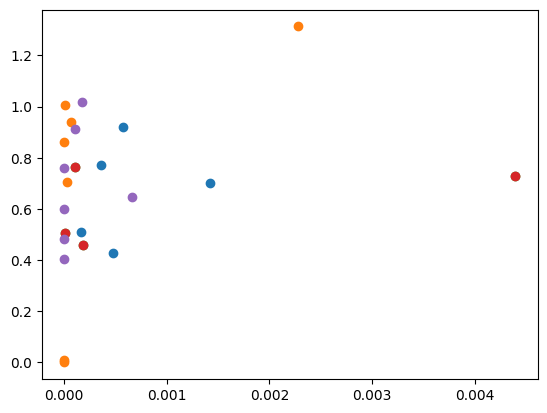

In [107]:
plt.plot(removed_mean_p_c5, removed_auc_c5, 'o')

In [101]:
removed_mean_p_c5 = mean_p_c5.copy()
removed_mean_p_c5[7][1] = 0

In [106]:
removed_auc_c5 = auc_c5.copy()
removed_auc_c5[7][1] = 0

In [100]:
auc_c6.shape

(8, 5)

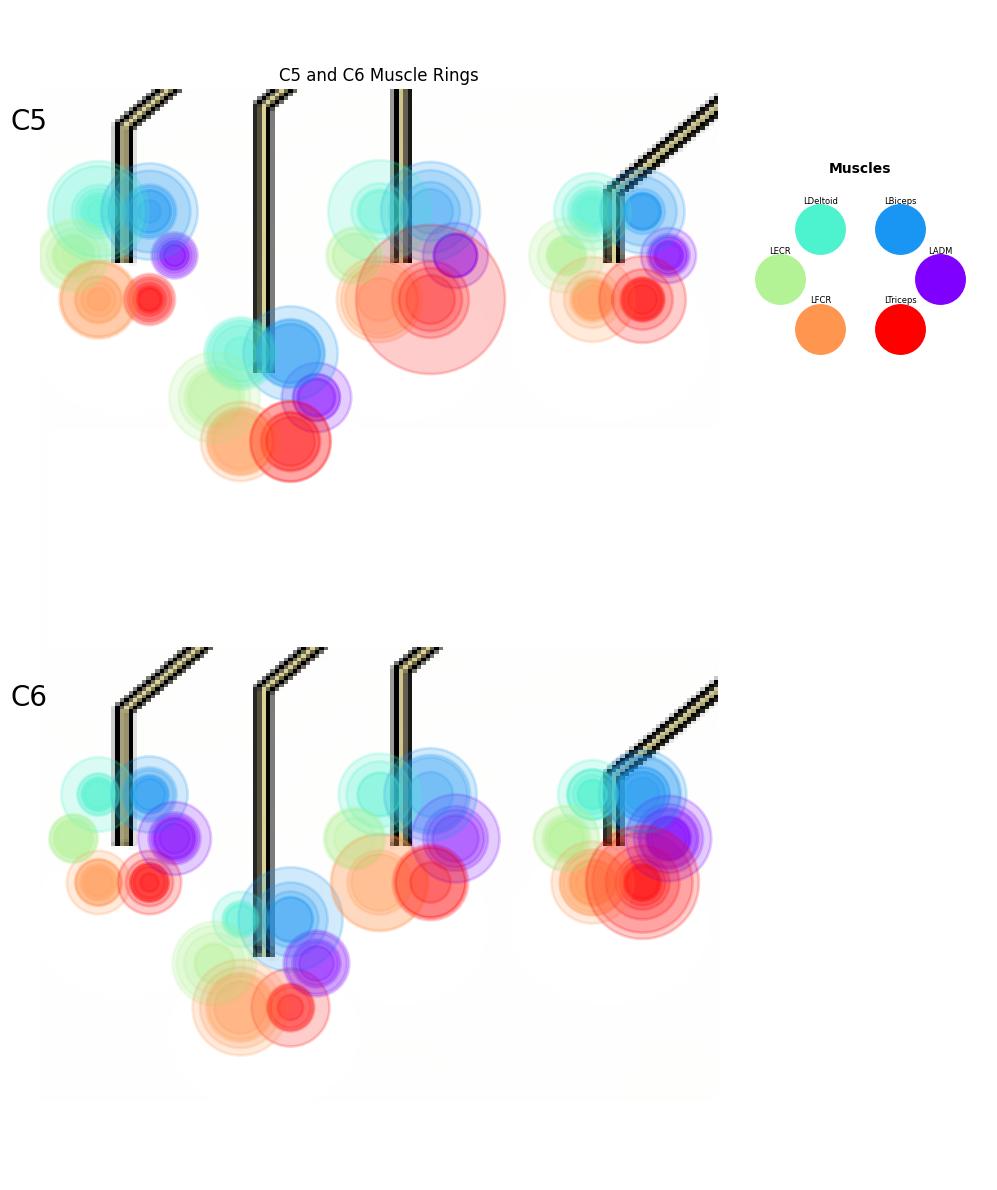

In [ ]:
rat_big_c5 = rat_big_c5.copy() if not rat_big_c5.flags.writeable else rat_big_c5
rat_big_c6 = rat_big_c6.copy() if not rat_big_c6.flags.writeable else rat_big_c6
colors = colors.copy() if not colors.flags.writeable else colors

x_vals_big_c5 = {"L":(126, 348),"LL":(56, 418), "LM":(195, 418), "M":(300, 418)}
x_vals_big_c6 = {"L":(126, 68),"LL":(56, 130), "LM":(195, 130), "M":(300, 130)}

# Plotting
fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1.5])



ax_image = fig.add_subplot(gs[0])
ax_image.set_title("C5 and C6 Muscle Rings")
ax_image.set_axis_off()  # Hide axis
ax_legend = fig.add_subplot(gs[1])
# Function to plot the muscle rings
def plot_ring(center, group, means, mask):
    radius = 25
    angle_offsets = np.linspace(0, 2 * np.pi, len(muscles), endpoint=False)
    
    for s, ind in enumerate(subjects):
        for musc_idx, angle in enumerate(angle_offsets):

            # if means[s][musc_idx].mask:
            #     continue
            offset_x = radius * np.cos(angle)
            offset_y = radius * np.sin(angle)
            if means[s,:].mask.all():
                continue
            eff_size = (1 / means[s][musc_idx]) * 1100
            alpha = 0.2            
            muscle_name = muscles[musc_idx]

            ax_image.scatter(
                center[0] + offset_x,
                center[1] + offset_y,
                s=eff_size,
                alpha=alpha,
                color=colors[musc_idx],
                linewidth=2,
            )

# Plot for C5 and C6 muscle locations
for i, (key, center) in enumerate(x_vals_big_c5.items()):
    plot_ring(center, "C5", rat_big_c5[:,i,:], rat_big_c5.mask)
for i, (key, center) in enumerate(x_vals_big_c6.items()):
    plot_ring(center, "C6", rat_big_c6[:,i,:], rat_big_c6.mask)

# Customize plot
im = plt.imread("/home/andres/C_SMA_LAR_white3.png")

ax_image.text(0, 480, "C5", fontsize= 20)
ax_image.text(0, 195, "C6", fontsize= 20)


ax_image.set_title("C5 and C6 Muscle Rings")
ax_image.set_axis_off()
ax_image.imshow(im, extent=[15, 350, 0, 500])

# Create legend with a ring of circles for each muscle
legend_center = (0.5, 0.77)  # Legend position in normalized axis coordinates
legend_radius = 0.07         # Radius for legend ring
angle_offsets = np.linspace(0, 2 * np.pi, len(muscles), endpoint=False)

# Draw circles and text for legend
for musc_idx, angle in enumerate(np.linspace(0, 2 * np.pi, len(muscles), endpoint=False)):
    offset_x = legend_radius * np.cos(angle)
    offset_y = legend_radius * np.sin(angle)
    ax_legend.scatter(
        legend_center[0] + offset_x*4.5,
        legend_center[1] + offset_y*0.7,
        s=1200,  # Fixed size for legend circles
        color=colors[musc_idx],
        alpha=1.0,
        transform=ax_legend.transAxes,
        zorder=10,
        linewidth=2
    )
    ax_legend.text(
        legend_center[0] + offset_x*4.5,
        legend_center[1] + offset_y*0.7+0.024,
        muscles[musc_idx],
        fontsize=6,
        ha="center",
        va="center",
        transform=ax_legend.transAxes
    )

# Add title for the legend
ax_legend.text(
    legend_center[0],
    legend_center[1] + legend_radius+0.024,
    "Muscles",
    transform=ax_legend.transAxes,
    fontsize=10,
    ha="center",
    va="center",
    fontweight="bold"
)
ax_legend.set_axis_off()
plt.tight_layout()
plt.show()



In [28]:
p_big = ma.sum(y_big, axis=-2, keepdims=True)
p_big = ma.where(p_big, y_big / p_big, 1 / y_big.shape[-2])
p_small = ma.sum(y_small, axis=-2, keepdims=True)
p_small = ma.where(p_small, y_small / p_small, 1 / y_small.shape[-2])

In [27]:
# p = ma.sum(y, axis=-2, keepdims=True)
# p = ma.where(p, y / p, 1 / y.shape[-2])

In [29]:
plogp_big = ma.where(p_big, p_big * ma.log(p_big), 0.)
plogp_small = ma.where(p_small, p_small * ma.log(p_small), 0.)

entropy_big = 1 + (plogp_big.sum(axis=-2) / ma.log(y_big.shape[-2]))
entropy_small = 1 + (plogp_small.sum(axis=-2) / ma.log(y_small.shape[-2]))


In [30]:
auc_big = np.trapz(y=entropy_big[...], x=np.linspace(0, MAX_THRESHOLD_CONST, NUM_THRESHOLD_POINTS), axis=-1)
auc_small = np.trapz(y=entropy_small[...], x=np.linspace(0, MAX_THRESHOLD_CONST, NUM_THRESHOLD_POINTS), axis=-1)

In [31]:
auc_big.shape

(8, 1, 4000, 5)

In [32]:
auc_big = auc_big.mean(axis=(2))
auc_small = auc_small.mean(axis=(2))
auc_big.shape

(8, 1, 5)

In [33]:
mat = auc_big - auc_small
mat = mat.mean(axis=(1,2))
mat.shape

(8,)

In [34]:
mat

masked_array(data=[-0.29247572613737083, -0.37060375221102876,
                   -0.07240368126741362, 0.08819247751086592,
                   -0.21377309659121801, -0.3076911824794817,
                   0.07821630081213153, -0.2609445116266059],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=1e+20)

In [34]:
src = f"/home/andres/repos/rat-mapping-paper/notebooks/C_SMA_LAR/cst_selectivity_means.pkl"

with open(src, "wb") as f:
    pickle.dump([auc_small, auc_big], f)

In [35]:
stats.wilcoxon(mat, axis=0)

WilcoxonResult(statistic=5.0, pvalue=0.078125)

In [56]:
plogp = ma.where(p, p * ma.log(p), 0.)

entropy = 1 + (plogp.sum(axis=-2) / ma.log(y.shape[-2]))
entropy.shape

(8, 2, 4000, 6, 2, 500)

In [57]:
auc = np.trapz(y=entropy[...], x=np.linspace(0, MAX_THRESHOLD_CONST, NUM_THRESHOLD_POINTS), axis=-1)
auc.shape

(8, 2, 4000, 6, 2)

In [58]:
auc = auc.mean(axis=(2))
auc.shape

(8, 2, 6, 2)

In [59]:
mat = auc[:, :, :,0] - auc[:,:, :, 1]

In [61]:
mat = mat.mean(axis=1)

In [ ]:
mat.shape

(8, 6)

In [81]:
y.shape

(8, 2, 4000, 6, 2, 6, 500)

In [ ]:
def plot_selectivity_comparison(size_ind):
    x, y = get_normalized_input_output(size_ind)
    num_masked = y.mask.any(axis=(1, 3, -1)).sum()
    y_max = ma.max(y, axis=(1, 3, -1), keepdims=True)
    
    num_masked = y.mask.sum()
    y = ma.where(y_max, y / y_max, 0.)
    
    p = ma.sum(y, axis=-2, keepdims=True)
    p = ma.where(p, y / p, 1 / y.shape[-2])
    
    plogp = ma.where(p, p * ma.log(p), 0.)

    entropy = 1 + (plogp.sum(axis=-2) / ma.log(y.shape[-2]))
    
    auc = np.trapz(y=entropy[...], x=np.linspace(0, MAX_THRESHOLD_CONST, NUM_THRESHOLD_POINTS), axis=-1)
    auc = auc.mean(axis=(2))
    
    mat = auc[:, :, :, None] - auc[:, :, None, :]
    mat = mat.mean(axis=1)
    
    pvalues = []
    for i in range(6):
        for i2 in range(6):
            if i==i2:
                pvalues.append(1)
                continue
            temp_p = stats.wilcoxon(mat[:, i,i2], axis=0).pvalue
            pvalues.append(temp_p)

    pvalues = np.array(pvalues)
    pvalues = pvalues.reshape(6, 6)
    
    labels = ['L', 'LL', 'LM', 'LM1', 'LM2', 'M']
    mask = np.tril(np.ones_like(pvalues), k=0).astype(bool)
    sns.heatmap(pvalues, xticklabels=labels, yticklabels=labels, mask = mask, annot=False)
    sns.heatmap(pvalues, xticklabels=labels, yticklabels=labels, mask = mask,annot=np.round(mat.mean(axis=0).data, 3), annot_kws={'va':'top'}, fmt="", cbar=False)
    sns.heatmap(pvalues, xticklabels=labels, yticklabels=labels, mask = mask,annot=np.round(pvalues, 3), annot_kws={'va':'bottom'}, fmt="", cbar=False)

In [ ]:
plot_selectivity_comparison(1)

In [ ]:
x,y = get_normalized_input_output(1)

y_max = ma.max(y, axis=(1, 3, -1), keepdims=True)

y = ma.where(y_max, y / y_max, 0.)

p = ma.sum(y, axis=-2, keepdims=True)
p = ma.where(p, y / p, 1 / y.shape[-2])

plogp = ma.where(p, p * ma.log(p), 0.)

entropy = 1 + (plogp.sum(axis=-2) / ma.log(y.shape[-2]))

auc = np.trapz(y=entropy[...], x=np.linspace(0, MAX_THRESHOLD_CONST, NUM_THRESHOLD_POINTS), axis=-1)
auc = auc.mean(axis=(2))

mat = auc[:, :, :, None] - auc[:, :, None, :]
mat = mat.mean(axis=1) 

In [ ]:
auc.shape 